In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
%matplotlib notebook
%matplotlib inline

In [2]:
# read dataset
auto = pd.read_csv('auto-mpg.csv')
auto.sort_values('model year', ascending=True, inplace = True)

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
...,...,...,...,...,...,...,...,...,...
368,27.0,4,112.0,88,2640,18.6,82,1,chevrolet cavalier wagon
367,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
381,36.0,4,107.0,75,2205,14.5,82,3,honda accord


In [3]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [4]:
f = auto['horsepower'] == '?'
df = auto[~f]
df['horsepower'] = pd.to_numeric(df['horsepower'])
df

C:\Users\q7901\AppData\Local\Temp/ipykernel_19860/4147422826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = pd.to_numeric(df['horsepower'])


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
...,...,...,...,...,...,...,...,...,...
368,27.0,4,112.0,88,2640,18.6,82,1,chevrolet cavalier wagon
367,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
381,36.0,4,107.0,75,2205,14.5,82,3,honda accord


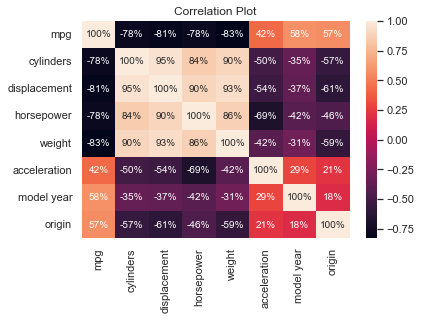

In [5]:
#correlation martix
sns.heatmap(df.corr(), annot=True, fmt ='.0%')
plt.title('Correlation Plot')
plt.show()

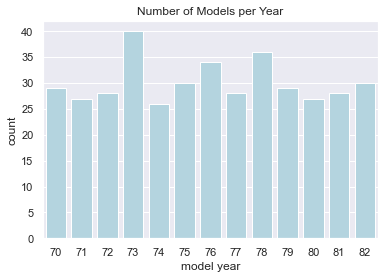

In [149]:
#  distribution of year
sns.countplot(x='model year', data=df,color='lightblue')
plt.title('Number of Models per Year')
plt.show()

Text(0.5, 1.0, 'Acceleration in different years')

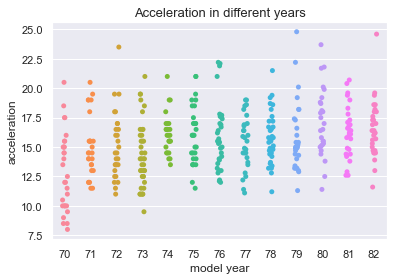

In [7]:
#  distribution of cylinders 
sns.stripplot(x="model year",y="acceleration",data=df)
plt.title("Acceleration in different years",fontsize=13)

Text(0.5, 1.0, 'Mpg vs. Weight')

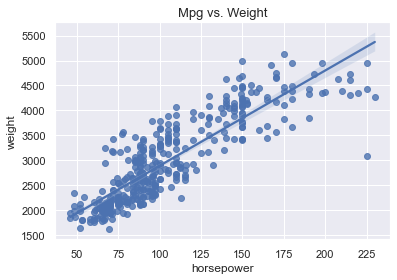

In [8]:
# Plot for horsepower and weight
sns.regplot(x="horsepower",y="weight",data=df)
plt.title("Mpg vs. Weight",fontsize=13)

Text(0.5, 1.0, 'Displacement at Different mpg')

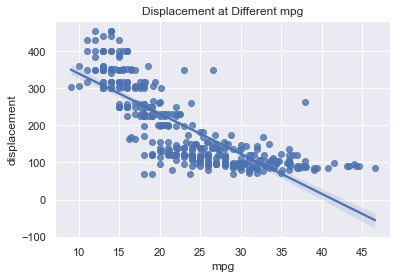

In [9]:
# Plot for mpg and displacement
sns.regplot(y= 'displacement',x='mpg',data=df)
plt.title('Displacement at Different mpg')

In [101]:
# divide data into training and test sets (70:30)
from sklearn.model_selection import train_test_split
X = df.drop(['model year','origin','car name','cylinders'], axis = 1).values

y = df['model year'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [102]:
# Perform standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
# 5 fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

k = 5
kf = KFold(n_splits=k)

Logistic Regression Model

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())

LogisticRegression()

In [105]:
# 5 fold cross validation
result_lr= cross_val_score(lr, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy: {result_lr.mean()}')

 Avg accuracy: 0.16794612794612793


In [106]:
# prediction
y_pred_lr = lr.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          70       0.55      0.55      0.55        11
          71       0.00      0.00      0.00         6
          72       0.00      0.00      0.00        11
          73       0.18      0.67      0.29         9
          74       0.00      0.00      0.00         9
          75       0.14      0.11      0.12         9
          76       0.07      0.17      0.10         6
          77       0.00      0.00      0.00        13
          78       0.00      0.00      0.00         9
          79       0.00      0.00      0.00        10
          80       0.17      0.11      0.13         9
          81       0.00      0.00      0.00         8
          82       0.08      0.12      0.10         8

    accuracy                           0.14       118
   macro avg       0.09      0.13      0.10       118
weighted avg       0.10      0.14      0.10       118



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
# save data value
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test, y_pred_lr,average='weighted')
value = [0.15, precision, recall,fscore]
value

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.15, 0.0971697793731692, 0.13559322033898305, 0.10388418079096044]

Gaussian Navie Bayes Model

In [108]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [109]:
# 5 fold cross validation
result_gnb = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result_gnb.mean()}')

 Avg accuracy:0.1385858585858586


In [110]:
# Prediction
y_pred_gnb = gnb.predict(X_test)

# Generating Classification Report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

          70       0.36      0.45      0.40        11
          71       0.00      0.00      0.00         6
          72       0.00      0.00      0.00        11
          73       0.16      0.33      0.21         9
          74       0.00      0.00      0.00         9
          75       0.10      0.22      0.13         9
          76       0.00      0.00      0.00         6
          77       0.00      0.00      0.00        13
          78       0.14      0.11      0.12         9
          79       0.00      0.00      0.00        10
          80       0.50      0.44      0.47         9
          81       0.00      0.00      0.00         8
          82       0.11      0.50      0.18         8

    accuracy                           0.16       118
   macro avg       0.10      0.16      0.12       118
weighted avg       0.11      0.16      0.12       118



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
# save data value
precision,recall,fscore,support=score(y_test, y_pred_gnb,average='weighted')
temp = [0.18, precision, recall,fscore]
for i in temp:
    value.append(i)
value

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.15,
 0.0971697793731692,
 0.13559322033898305,
 0.10388418079096044,
 0.18,
 0.10896055989722359,
 0.16101694915254236,
 0.12128040481729414]

Decision Trees Model

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
# 5 fold cross validation
result_dt = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result_dt.mean()}')

 Avg accuracy:0.20457912457912455


In [114]:
# Prediction
y_pred_dt = dt.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          70       0.36      0.45      0.40        11
          71       0.67      0.33      0.44         6
          72       0.22      0.18      0.20        11
          73       0.31      0.44      0.36         9
          74       0.33      0.22      0.27         9
          75       0.12      0.11      0.12         9
          76       0.00      0.00      0.00         6
          77       0.38      0.23      0.29        13
          78       0.06      0.11      0.08         9
          79       0.00      0.00      0.00        10
          80       0.17      0.11      0.13         9
          81       0.00      0.00      0.00         8
          82       0.09      0.12      0.11         8

    accuracy                           0.19       118
   macro avg       0.21      0.18      0.18       118
weighted avg       0.21      0.19      0.19       118



In [115]:
# save data value
precision,recall,fscore,support=score(y_test, y_pred_dt,average='weighted')
temp = [0.14, precision, recall,fscore]
for i in temp:
  value.append(i)
value

[0.15,
 0.0971697793731692,
 0.13559322033898305,
 0.10388418079096044,
 0.18,
 0.10896055989722359,
 0.16101694915254236,
 0.12128040481729414,
 0.14,
 0.2110078909680106,
 0.1864406779661017,
 0.19022810286912714]

Random Forests Model

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [117]:
# 5 fold cross validation
result_rf = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result_rf.mean()}')

 Avg accuracy:0.18626262626262627


In [118]:
# predictioon
y_pred_rf = rf.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          70       0.46      0.55      0.50        11
          71       0.20      0.33      0.25         6
          72       0.10      0.09      0.10        11
          73       0.25      0.22      0.24         9
          74       0.25      0.33      0.29         9
          75       0.10      0.11      0.11         9
          76       0.00      0.00      0.00         6
          77       0.17      0.08      0.11        13
          78       0.07      0.11      0.08         9
          79       0.25      0.10      0.14        10
          80       0.00      0.00      0.00         9
          81       0.10      0.12      0.11         8
          82       0.40      0.25      0.31         8

    accuracy                           0.18       118
   macro avg       0.18      0.18      0.17       118
weighted avg       0.19      0.18      0.17       118



In [119]:
# save data value
precision,recall,fscore,support=score(y_test, y_pred_rf,average='weighted')
temp = [0.14, precision, recall,fscore]
for i in temp:
  value.append(i)
value

[0.15,
 0.0971697793731692,
 0.13559322033898305,
 0.10388418079096044,
 0.18,
 0.10896055989722359,
 0.16101694915254236,
 0.12128040481729414,
 0.14,
 0.2110078909680106,
 0.1864406779661017,
 0.19022810286912714,
 0.14,
 0.1868100825727944,
 0.17796610169491525,
 0.17441934686910288]

Support Vector Machines Model

In [120]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [121]:
# 5 fold cross validation
result_lin = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
result_pol = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
result_rbf = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
result_sig = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f'Linear - Avg accuracy:{result_lin.mean()}')
print(f'Polynomial - Avg accuracy:{result_pol.mean()}')
print(f'Radial Basis - Avg accuracy:{result_rbf.mean()}')
print(f'Sigmoid - Avg accuracy:{result_sig.mean()}')

Linear - Avg accuracy:0.20094276094276098
Polynomial - Avg accuracy:0.18626262626262624
Radial Basis - Avg accuracy:0.20067340067340064
Sigmoid - Avg accuracy:0.1424242424242424


In [122]:
# predictioon
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

# Classification Report
print(f'Classification Report for Linear SVM')
print(classification_report(y_test, linear_pred))

print(f'Classification Report for Poly SVM')
print(classification_report(y_test, poly_pred))

print(f'Classification Report for RBF SVM')
print(classification_report(y_test, rbf_pred))

print(f'Classification Report for SIG SVM')
print(classification_report(y_test, sig_pred))

Classification Report for Linear SVM
              precision    recall  f1-score   support

          70       0.56      0.45      0.50        11
          71       0.00      0.00      0.00         6
          72       0.00      0.00      0.00        11
          73       0.17      0.67      0.27         9
          74       0.00      0.00      0.00         9
          75       0.00      0.00      0.00         9
          76       0.05      0.17      0.08         6
          77       0.00      0.00      0.00        13
          78       0.00      0.00      0.00         9
          79       0.00      0.00      0.00        10
          80       0.00      0.00      0.00         9
          81       0.00      0.00      0.00         8
          82       0.14      0.12      0.13         8

    accuracy                           0.11       118
   macro avg       0.07      0.11      0.08       118
weighted avg       0.08      0.11      0.08       118

Classification Report for Poly SVM
       

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarn

Based on above, choose rbf svm

In [123]:
# save data value
precision,recall,fscore,support=score(y_test, rbf_pred,average='weighted')
temp = [0.14, precision, recall,fscore]
for i in temp:
  value.append(i)
value

[0.15,
 0.0971697793731692,
 0.13559322033898305,
 0.10388418079096044,
 0.18,
 0.10896055989722359,
 0.16101694915254236,
 0.12128040481729414,
 0.14,
 0.2110078909680106,
 0.1864406779661017,
 0.19022810286912714,
 0.14,
 0.1868100825727944,
 0.17796610169491525,
 0.17441934686910288,
 0.14,
 0.1747421809531533,
 0.16101694915254236,
 0.14346862188080467]

K-Nearest Neighbors Model

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [125]:
# 5 fold cross validation
result_knn = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result_knn.mean()}')

 Avg accuracy:0.18262626262626264


In [126]:
# prediction
y_pred_knn = knn.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          70       0.35      0.55      0.43        11
          71       0.20      0.67      0.31         6
          72       0.00      0.00      0.00        11
          73       0.09      0.11      0.10         9
          74       0.17      0.11      0.13         9
          75       0.08      0.11      0.10         9
          76       0.12      0.17      0.14         6
          77       0.20      0.08      0.11        13
          78       0.13      0.22      0.17         9
          79       0.00      0.00      0.00        10
          80       0.17      0.11      0.13         9
          81       0.00      0.00      0.00         8
          82       0.20      0.12      0.15         8

    accuracy                           0.16       118
   macro avg       0.13      0.17      0.14       118
weighted avg       0.13      0.16      0.13       118



In [127]:
# save data value
precision,recall,fscore,support=score(y_test, y_pred_knn,average='weighted')
temp = [0.14, precision, recall,fscore]
for i in temp:
  value.append(i)
value

[0.15,
 0.0971697793731692,
 0.13559322033898305,
 0.10388418079096044,
 0.18,
 0.10896055989722359,
 0.16101694915254236,
 0.12128040481729414,
 0.14,
 0.2110078909680106,
 0.1864406779661017,
 0.19022810286912714,
 0.14,
 0.1868100825727944,
 0.17796610169491525,
 0.17441934686910288,
 0.14,
 0.1747421809531533,
 0.16101694915254236,
 0.14346862188080467,
 0.14,
 0.1339028369437143,
 0.16101694915254236,
 0.13347405889778768]

In [128]:
# create dataframe for comparison 6 models
models = pd.DataFrame()

model = ['LOG-R','LOG-R','LOG-R','LOG-R','G-NB','G-NB','G-NB','G-NB','DT','DT','DT','DT','RF','RF','RF','RF','RBF-SVM','RBF-SVM','RBF-SVM','RBF-SVM','KNN','KNN','KNN','KNN']
data = ['Accuracy','Precision','Recall','F1','Accuracy','Precision','Recall','F1','Accuracy','Precision','Recall','F1','Accuracy','Precision','Recall','F1','Accuracy','Precision','Recall','F1','Accuracy','Precision','Recall','F1']

models['Model'] = model
models['Data_Type'] = data
models['Number'] = value

models

,Model,Data_Type,Number
0,LOG-R,Accuracy,0.150000
1,LOG-R,Precision,0.097170
2,LOG-R,Recall,0.135593
3,LOG-R,F1,0.103884
4,G-NB,Accuracy,0.180000
5,G-NB,Precision,0.108961
6,G-NB,Recall,0.161017
7,G-NB,F1,0.121280
8,DT,Accuracy,0.140000
9,DT,Precision,0.211008


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Comparison of Six Models')

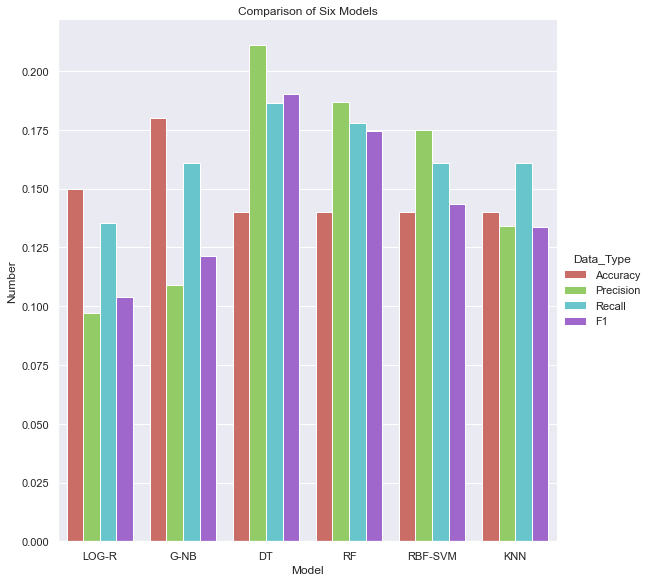

In [129]:
# plot comparison
sns.catplot(data=models, x='Model', y='Number', hue='Data_Type', palette='hls', kind='bar', size=8)
plt.title('Comparison of Six Models')